# Identification of Different Medicinal Plants/Raw materials through Image Processing Using Machine Learning Algorithms

In a project aiming to identify medicinal plants and raw materials through image processing with machine learning, the data preparation approach has been enhanced. Convolutional Neural Networks (CNNs) are incorporated to improve image analysis.

This code gathers images from a source folder and stores them in a separate destination folder. What sets this approach apart is the utilization of CNNs, enabling the project to discern intricate image details. This analysis enhances plant identification precision through machine learning techniques.

By employing CNNs, the dataset becomes better suited for training and feature extraction, ultimately improving the accuracy of the plant identification process. This step signifies a critical advancement in the project's capabilities, enabling more reliable and detailed results when identifying different medicinal plants and raw materials.

## Importing Necessary Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot  as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets, layers, models

import os
import random
import shutil
from sklearn.model_selection import train_test_split

## Splitting the Dataset

In [2]:
src_dataset = r"C:\Users\Ojasvi Doye\OneDrive\Desktop\SIH\FinalPPT\src_dataset"
train_dataset = r"C:\Users\Ojasvi Doye\OneDrive\Desktop\SIH\FinalPPT\Train"
validation_dataset = r"C:\Users\Ojasvi Doye\OneDrive\Desktop\SIH\FinalPPT\Val"
test_dataset = r"C:\Users\Ojasvi Doye\OneDrive\Desktop\SIH\FinalPPT\Test"

train_ratio = 0.8

os.makedirs(train_dataset, exist_ok=True)
os.makedirs(validation_dataset, exist_ok=True)
os.makedirs(test_dataset, exist_ok=True)

for class_name in os.listdir(src_dataset):
    class_src = os.path.join(src_dataset, class_name)
    class_train = os.path.join(train_dataset, class_name)
    class_validation = os.path.join(validation_dataset, class_name)
    class_test = os.path.join(test_dataset, class_name)

    os.makedirs(class_train, exist_ok=True)
    os.makedirs(class_validation, exist_ok=True)
    os.makedirs(class_test, exist_ok=True)

    files = os.listdir(class_src)
    random.shuffle(files)

    split_index_train = int(train_ratio * len(files))
    split_index_validation = int((train_ratio + 0.1) * len(files))

    train_files = files[:split_index_train]
    validation_files = files[split_index_train:split_index_validation]
    test_files = files[split_index_validation:]

    for file in train_files:
        shutil.copy(os.path.join(class_src, file), os.path.join(class_train, file))

    for file in validation_files:
        shutil.copy(os.path.join(class_src, file), os.path.join(class_validation, file))

    for file in test_files:
        shutil.copy(os.path.join(class_src, file), os.path.join(class_test, file))

## Batch Image Resizing 

### 1. For Train Dataset

In [3]:
from PIL import Image
import os

main_folder = r"C:\Users\Ojasvi Doye\OneDrive\Desktop\SIH\FinalPPT\Train"
output_folder = r"C:\Users\Ojasvi Doye\OneDrive\Desktop\SIH\FinalPPT\TrainResize"
os.makedirs(output_folder, exist_ok=True)

target_size = (256, 256)

for root, _, files in os.walk(main_folder):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
            image_path = os.path.join(root, file)
            img = Image.open(image_path)
            resized_img = img.resize(target_size)

            # Get the relative path within the main folder
            relative_path = os.path.relpath(root, main_folder)

            # Create the new folder in the output folder
            new_folder_path = os.path.join(output_folder, relative_path)
            os.makedirs(new_folder_path, exist_ok=True)

            # Output path for the resized image
            output_path = os.path.join(new_folder_path, file)

            resized_img.save(output_path)

### 2. For Validation Dataset

In [4]:
main_folder = r"C:\Users\Ojasvi Doye\OneDrive\Desktop\SIH\FinalPPT\Val"
output_folder = r"C:\Users\Ojasvi Doye\OneDrive\Desktop\SIH\FinalPPT\ValResize"
os.makedirs(output_folder, exist_ok=True)

target_size = (256, 256)

for root, _, files in os.walk(main_folder):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
            image_path = os.path.join(root, file)
            img = Image.open(image_path)
            resized_img = img.resize(target_size)

            # Get the relative path within the main folder
            relative_path = os.path.relpath(root, main_folder)

            # Create the new folder in the output folder
            new_folder_path = os.path.join(output_folder, relative_path)
            os.makedirs(new_folder_path, exist_ok=True)

            # Output path for the resized image
            output_path = os.path.join(new_folder_path, file)

            resized_img.save(output_path)       

### 3. For Test Dataset

In [5]:
main_folder = r"C:\Users\Ojasvi Doye\OneDrive\Desktop\SIH\FinalPPT\Test"
output_folder = r"C:\Users\Ojasvi Doye\OneDrive\Desktop\SIH\FinalPPT\TestResize"
os.makedirs(output_folder, exist_ok=True)

target_size = (256, 256)

for root, _, files in os.walk(main_folder):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
            image_path = os.path.join(root, file)
            img = Image.open(image_path)
            resized_img = img.resize(target_size)

            # Get the relative path within the main folder
            relative_path = os.path.relpath(root, main_folder)

            # Create the new folder in the output folder
            new_folder_path = os.path.join(output_folder, relative_path)
            os.makedirs(new_folder_path, exist_ok=True)

            # Output path for the resized image
            output_path = os.path.join(new_folder_path, file)

            resized_img.save(output_path)     

## Rescaling and Data Augmentation for Image Classification

In an image classification project, data is optimized for machine learning by rescaling images for consistency and applying data augmentation for improved model robustness. These techniques enhance the dataset for accurate identification of medicinal plants and raw materials.

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

batch_size = 11

train_generator = train_datagen.flow_from_directory(
    directory=train_dataset,
    batch_size=batch_size,
    class_mode='categorical' 
)

validation_generator = validation_datagen.flow_from_directory(
    directory=validation_dataset,
    batch_size=batch_size,
    class_mode='categorical'  
)

Found 1659 images belonging to 3 classes.
Found 208 images belonging to 3 classes.


## Creating a Convolutional Neural Network (CNN) Model 

This code segment outlines the creation of a Convolutional Neural Network (CNN) model. CNNs are essential for image-related tasks, and this model is being designed for image classification in our project. The model architecture includes convolutional and pooling layers, followed by fully connected layers, culminating in an output layer for classification. This foundational step lays the groundwork for effective image recognition in our project.

In [7]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                           input_shape=(256, 256, 3), padding='same'), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])



## Customizing Learning Rate for Adam Optimizer in a Keras Model

In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Training a Keras Model on Image Data Using Data Generators

In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/30
151/151 [==============================] - 120s 790ms/step - loss: 1.0928 - accuracy: 0.5262 - val_loss: 0.8093 - val_accuracy: 0.6346
Epoch 2/30
151/151 [==============================] - 121s 799ms/step - loss: 0.8936 - accuracy: 0.5973 - val_loss: 0.6025 - val_accuracy: 0.7596
Epoch 3/30
151/151 [==============================] - 111s 732ms/step - loss: 0.5619 - accuracy: 0.8023 - val_loss: 0.5170 - val_accuracy: 0.7981
Epoch 4/30
151/151 [==============================] - 110s 728ms/step - loss: 0.4241 - accuracy: 0.8481 - val_loss: 1.1856 - val_accuracy: 0.7019
Epoch 5/30
151/151 [==============================] - 132s 873ms/step - loss: 0.3929 - accuracy: 0.8656 - val_loss: 0.4002 - val_accuracy: 0.8269
Epoch 6/30
151/151 [==============================] - 129s 853ms/step - loss: 0.3634 - accuracy: 0.8782 - val_loss: 0.3014 - val_accuracy: 0.8798
Epoch 7/30
151/151 [==============================] - 130s 862ms/step - loss: 0.3285 - accuracy: 0.8855 - val_loss: 0.1915 -

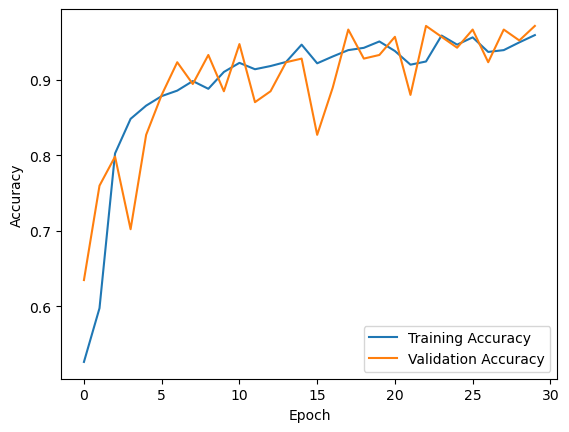

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

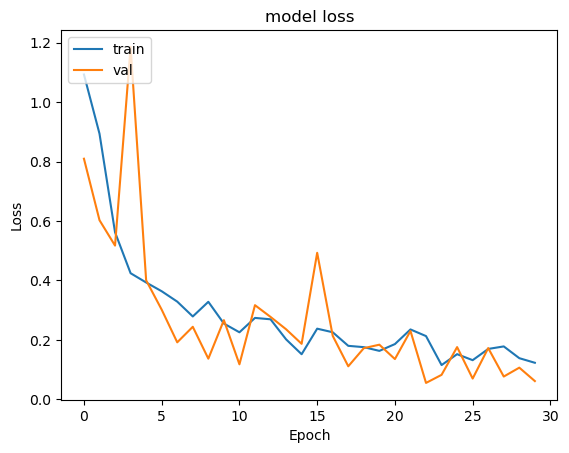

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Evaluating a Keras Model on a Test Dataset Using a Data Generator

In [11]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

test_generator = test_datagen.flow_from_directory(
    directory=test_dataset,
    batch_size=batch_size,
    class_mode='categorical' 
)

test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Found 209 images belonging to 3 classes.
19/19 [==============================] - 7s 330ms/step - loss: 0.0494 - accuracy: 0.9761
Test Accuracy: 97.61%
